<a href="https://colab.research.google.com/github/austinvanderlyn/School-Files/blob/master/T1Chapter5MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


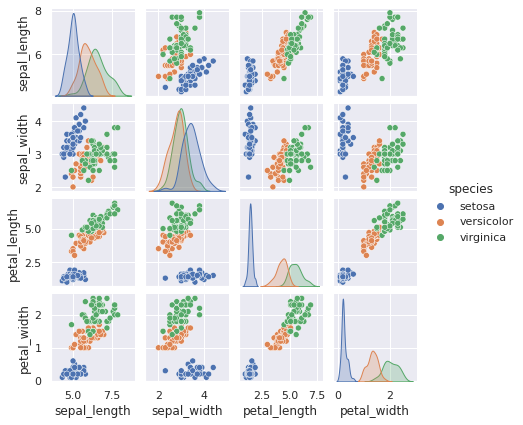

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris,
             hue = "species",
             size = 1.5)

In [3]:
X_iris = iris.drop("species",
                   axis = 1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris["species"]
y_iris.shape

(150,)

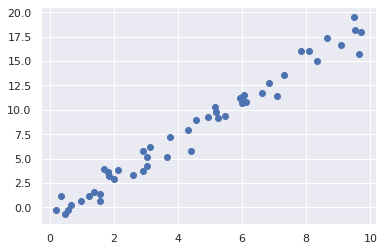

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311146

In [12]:
xfit = np.linspace(-1, 11)

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

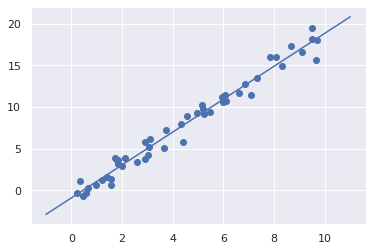

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state = 1)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [18]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


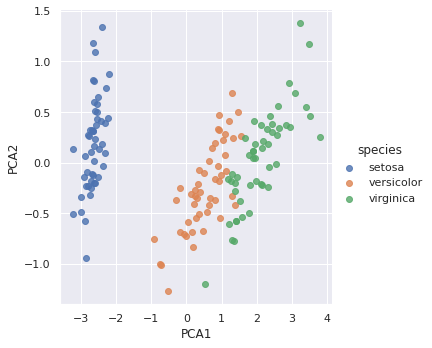

In [19]:
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2",
           hue = "species",
           data = iris,
           fit_reg = False)

In [20]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3,
            covariance_type = "full")
model.fit(X_iris)
y_gmm = model.predict(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


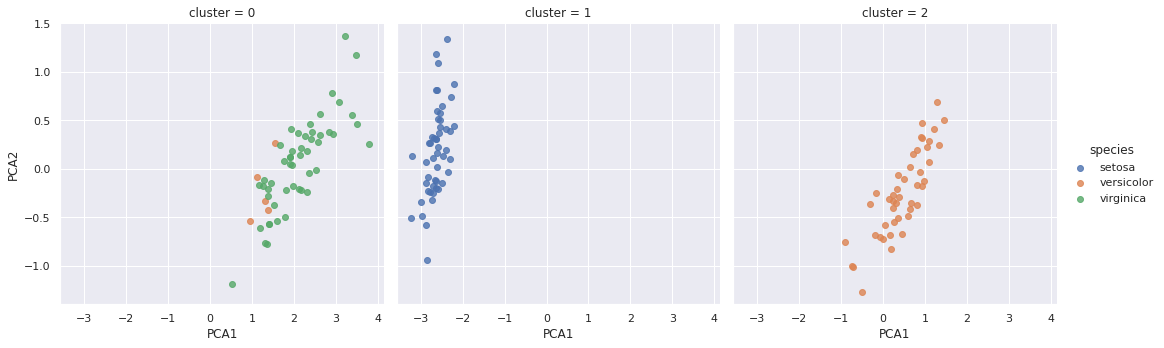

In [21]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2",
           data = iris,
           hue = "species",
           col = "cluster",
           fit_reg = False)

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

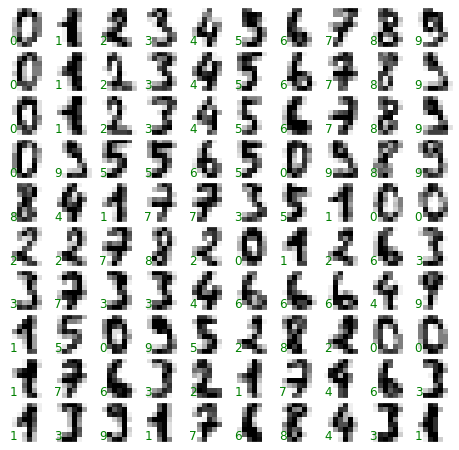

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10,
                         figsize = (8, 8),
                         subplot_kw = {"xticks":[], "yticks":[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i],
            cmap = "binary",
            interpolation = "nearest")
  ax.text(0.05, 0.05,
          str(digits.target[i]),
              transform = ax.transAxes,
              color = "green")

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

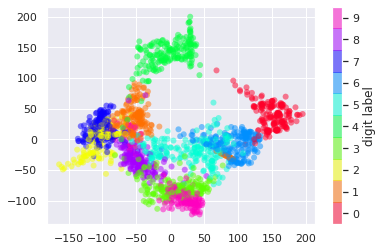

In [27]:
plt.scatter(data_projected[:, 0],
            data_projected[:, 1],
            c = digits.target,
            edgecolor = "none",
            alpha = 0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar(label = "digit label", ticks = range(10))
plt.clim(-0.5, 9.5)

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

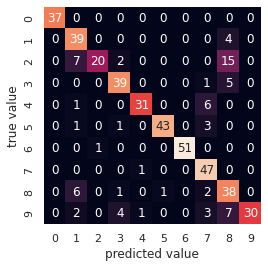

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat,
            square = True,
            annot = True,
            cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

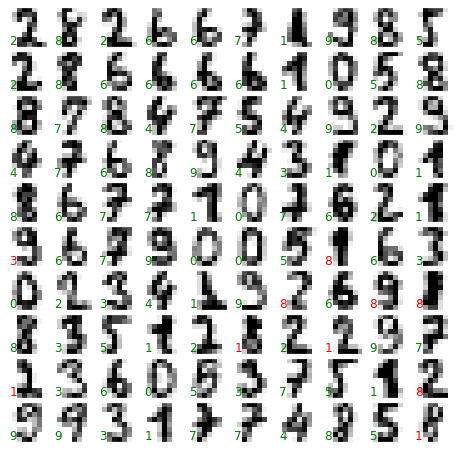

In [33]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [36]:
model.fit(X, y)
y_model = model.predict(X)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [38]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y,
                                  random_state = 0,
                                  train_size = 0.5)

In [39]:
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [40]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [41]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [45]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

TypeError: ignored

In [46]:
scores.mean()

NameError: ignored

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2,
                         **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))

In [48]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1/(X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y

X, y = make_data(40)

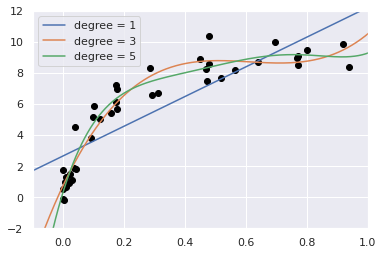

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = "black")
axis = plt.axis()
for degree in [1, 3, 5]:
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label = "degree = {0}".format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = "best")

In [61]:
from sklearn.utils import validation
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, degree)


TypeError: ignored

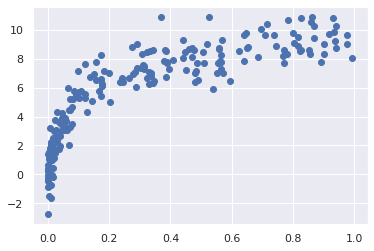

In [62]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [66]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [67]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False,
                     dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [68]:
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [69]:
vec = DictVectorizer(sparse = True, 
                     dtype = int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [70]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [72]:
import pandas as pd
pd.DataFrame(X.toarray(),
             columns = vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(),
             columns = vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


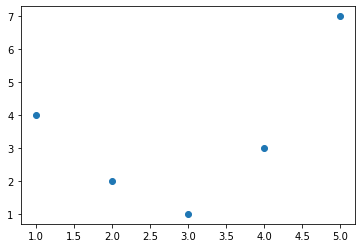

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

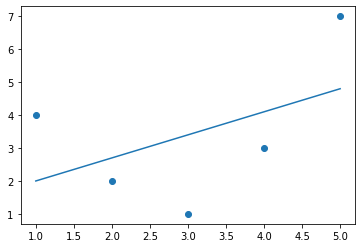

In [2]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,
                          include_bias = False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


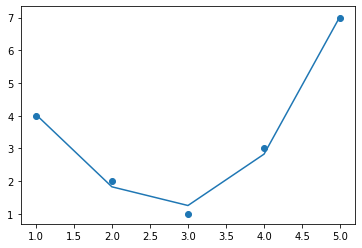

In [5]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

In [6]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "mean")
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [9]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [10]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy = "mean"),
                      PolynomialFeatures(degree = 2),
                      LinearRegression())

In [11]:
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

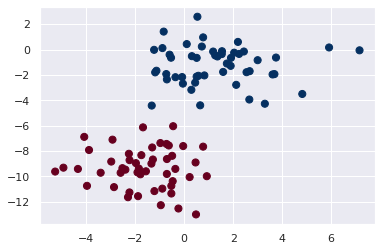

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2,
                  centers = 2,
                  random_state = 2,
                  cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "RdBu")

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

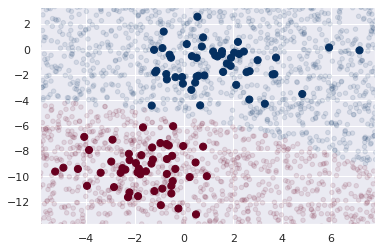

In [6]:
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "RdBu")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1],
            c = ynew,
            s = 20,
            cmap = "RdBu",
            alpha = 0.1)
plt.axis(lim)

In [7]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset = "train",
                           categories = categories)
test = fetch_20newsgroups(subset = "test",
                          categories = categories)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),
                      MultinomialNB())

In [12]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.18, 0.5, 'predicted label')

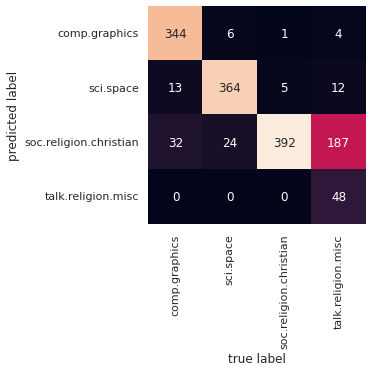

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T,
            square = True,
            annot = True,
            fmt = "d",
            cbar = False,
            xticklabels = train.target_names,
            yticklabels = train.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [14]:
def predict_category(s, train = train, model = model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [15]:
predict_category("sending a payload to the ISS")

'sci.space'

In [16]:
predict_category("discussing islam vs atheism")

'soc.religion.christian'

In [17]:
predict_category("determining the screen resolution")

'comp.graphics'

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

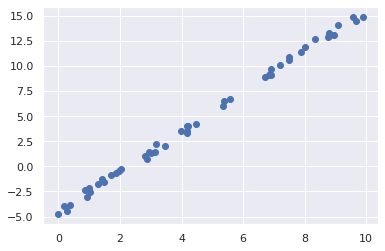

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x, y)

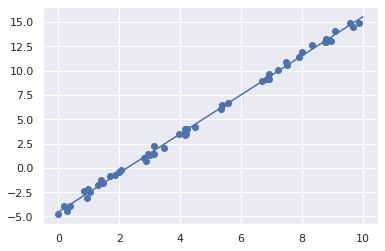

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [23]:
print("Model Slope:", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model Slope: 2.0082302432277497
Model Intercept: -4.533652972099125


In [24]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2, 1])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000056
[ 1.5 -2.   1. ]
